<a href="https://colab.research.google.com/github/sabrinabms/RNA-MPCA/blob/main/rna%26mpca.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # **REDE NEURAL AUTO-CONFIGURADA PELO MPCA**
*Neste pacote é adotada uma abordagem automática para identificar a melhor arquitetura para a RNA. Essa identificação é formulada como um problema de otimização, resolvido por uma nova metaheurística: Algoritmo de Colisão de Partículas Múltiplas (MPCA).*

*O exemplo usado para testar o RNA&MPCA é o mesmo usado no artigo abaixo, onde são apresentados medidas de radiância para estimar 40 valores de temperatura (perfil).*


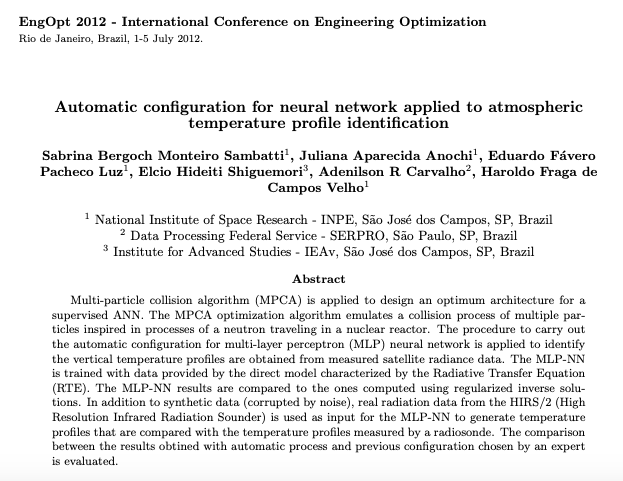

In [1]:
# Importando as bibliotecas necessárias
import os.path
import shutil
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *

In [2]:
%cd /content

In [3]:
# Verifica se pasta jah existe, se sim ela eh deletada para poder atualizar com
# a nova versao do Github

pasta = 'RNA-MPCA'

if os.path.isdir(pasta): # vemos que este diretorio já existe
  print ('Ja existe uma pasta com esse nome!')
  shutil.rmtree(pasta)

In [4]:
# Baixa o pacote RNA&MPCA a partir do Github

!git clone https://github.com/sabrinabms/RNA-MPCA.git

In [5]:
%cd RNA-MPCA/

# **Visualizando os dados de treinamento: padrões de saida desejada**

In [6]:
cwd = os.getcwd()
pasta_data = cwd+'/data/'
# Entradas
entrada = pd.read_csv(pasta_data + 'x.txt',"r", header=None, delimiter=r"\s+")
entrada_gen = pd.read_csv(pasta_data + 'x_gen.txt',"r", header=None, delimiter=r"\s+")
entrada_valid = pd.read_csv(pasta_data + 'x_valid.txt',"r", header=None, delimiter=r"\s+")
# Saidas
saida = pd.read_csv(pasta_data + 'y.txt',"r", header=None, delimiter=r"\s+")
saida_gen = pd.read_csv(pasta_data + 'y_gen.txt',"r", header=None, delimiter=r"\s+")
saida_valid = pd.read_csv(pasta_data + 'y_valid.txt',"r", header=None, delimiter=r"\s+")

In [7]:
entrada.shape, saida.shape

((7, 250), (40, 250))

In [8]:
entrada_gen.shape, saida_gen.shape

((7, 346), (40, 346))

In [9]:
entrada_valid.shape, saida_valid.shape

((7, 50), (40, 50))

In [10]:
# Entrada
entrada_num = entrada.to_numpy()
entrada_gen_num = entrada_gen.to_numpy()
entrada_valid_num = entrada_valid.to_numpy()
# Saida
saida_num = saida.to_numpy()
saida_gen_num = saida_gen.to_numpy()
saida_valid_num = saida_valid.to_numpy()

In [31]:
entrada_num.shape

(7, 250)

In [11]:
eixo_y = np.array([1.00e-01, 2.00e-01, 5.00e-01, 1.00e+00, 1.50e+00, 2.00e+00,
       3.00e+00, 4.00e+00, 5.00e+00, 7.00e+00, 1.00e+01, 1.50e+01,
       2.00e+01, 2.50e+01, 3.00e+01, 5.00e+01, 6.00e+01, 7.00e+01,
       8.50e+01, 1.00e+02, 1.15e+02, 1.35e+02, 1.50e+02, 2.00e+02,
       2.50e+02, 3.00e+02, 3.50e+02, 4.00e+02, 4.30e+02, 4.75e+02,
       5.00e+02, 5.70e+02, 6.20e+02, 6.70e+02, 7.00e+02, 7.80e+02,
       8.50e+02, 9.20e+02, 9.50e+02, 1.00e+03])

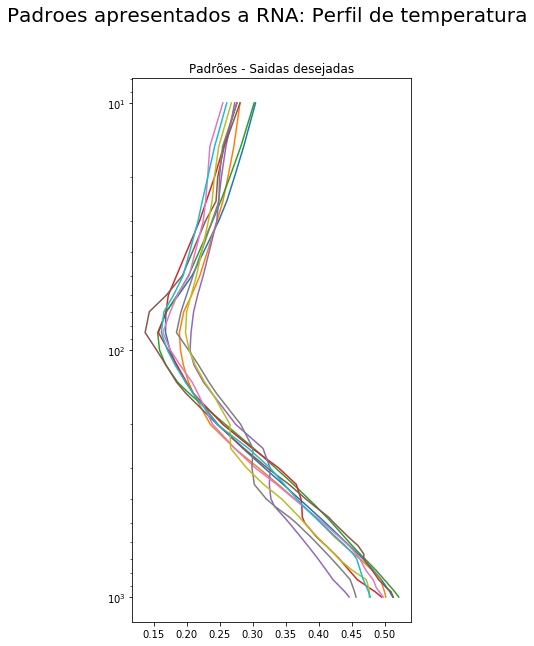

In [12]:
f1_master, f1_axes = plt.subplots(figsize=(5,10))
f1_master.suptitle('Padroes apresentados a RNA: Perfil de temperatura', size = 20)
f1_axes.set_title('Padrões - Saidas desejadas')
f1_axes.plot(saida_num[10:,0:10],eixo_y[10:])
f1_axes.set_yscale('log')
f1_axes.invert_yaxis()

# **Iniciando o processo: RNA&MPCA**


In [13]:
!make clean

rm -f build/*.o *.mod
rm -rf *.*~ Makefile~ build/*.o *.mod annActivation annTest annMPCA


# **Define no próximo bloco os valores das seguintes variáveis:**
*   **n_proc**: numero de processadores
*   **n_exp**: numero de experimentos

In [14]:
n_proc = 2
n_exp = 2

In [15]:
!./runMPCA {n_exp} {n_proc}

mpif90 -c -O3 -g -w src/foul.f90 -o build/foul.o
mpif90 -c -O3 -g -w src/newTypes.f90 -o build/newTypes.o
mpif90 -c -O3 -g -w src/uniformR8.f90 -o build/uniformR8.o
mpif90 -c -O3 -g -w src/normalR8.f90 -o build/normalR8.o
mpif90 -c -O3 -g -w src/annTraining.f90 -o build/annTraining.o
mpif90 -c -O3 -g -w src/mpcaFunctions.f90 -o build/mpcaFunctions.o
mpif90 -c -O3 -g -w src/mpca.f90 -o build/mpca.o
mpif90 -c -O3 -g -w src/annActivation.f90 -o build/annActivation.o
mpif90 -c -O3 -g -w src/annGeneralization.f90 -o build/annGeneralization.o
mpif90 -c -O3 -g -w src/main_generalization.f90 -o build/main_generalization.o
mpif90 -c -O3 -g -w src/main_activation.f90 -o build/main_activation.o
mpif90 -O3 -g -w -o annMPCA build/foul.o build/uniformR8.o build/newTypes.o build/normalR8.o build/annTraining.o build/mpcaFunctions.o build/mpca.o
mpif90 -O3 -g -w -o annTest build/foul.o build/newTypes.o build/annGeneralization.o build/main_generalization.o
mpif90 -O3 -g -w -o annActivation build/foul.o 

In [16]:
!./annTest {n_exp} {n_proc}

 ************************************************************
 Num. exps:            2
 Num. procs:            2
 ************************************************************
 Best objective function value:   0.24812660000000000     
 Number of hidden layers:            2
 Neurons in hidden layer 1:           24
 Activation function:            2
 Alpha: 
 Eta: 
 Best result: ./output/ann2.best
 result_ys.out


In [22]:
!./annActivation

 ****************************************************************
                    RNA Activation
 ****************************************************************
  Number of activation classes:          346
  Number of hidden layers:            2
  Neurons in hidden layer 1:           24
  Neurons in hidden layer 2:           15
 Activation - Mean Square Error:  -0.22070847837409452     


In [33]:
cwd = os.getcwd()
pasta_out = cwd+'/output/'
saida_out = pd.read_csv(pasta_out + 'y_activation.txt', header=None, delimiter=r"\s+")

In [34]:
saida_out.shape

(40, 346)

In [37]:
saida_out_num = saida_out.to_numpy()
saida_out_num.shape

(40, 346)

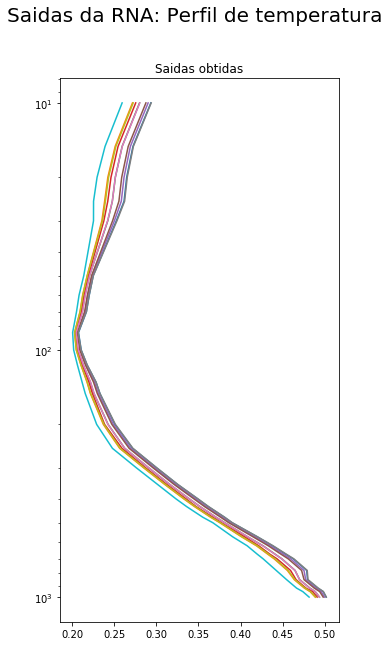

In [39]:
f2_master, f2_axes = plt.subplots(figsize=(5,10))
f2_master.suptitle('Saidas da RNA: Perfil de temperatura', size = 20)
f2_axes.set_title('Saidas obtidas')
f2_axes.plot(saida_out_num[10:,0:10],eixo_y[10:])
f2_axes.set_yscale('log')
f2_axes.invert_yaxis()